In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [84]:
df=pd.read_csv('HousePrices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [86]:
df2=df.copy()

In [5]:
df.shape

(2073, 81)

In [6]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [7]:
print(df.dtypes)

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
                        ...   
MoSold                   int64
YrSold                   int64
SaleType                object
SaleCondition           object
Property_Sale_Price      int64
Length: 81, dtype: object


In [8]:
cat_col=df.dtypes[df.dtypes=="object"].index
num_col=df.dtypes[df.dtypes!="object"].index

In [9]:
print(len(cat_col),len(num_col))

43 38


In [10]:
def null_values(data):
    nv=data.isnull().sum()
    nv=nv[nv>0]
    n=pd.DataFrame({"Serial":range(1,len(nv)+1),'Features':nv.index,"Null_values":nv.values,
                                  "Percentage":nv.values/data.shape[0]*100})
    return n

In [11]:
null_data=null_values(df)
null_data

,Serial,Features,Null_values,Percentage
0,1,LotFrontage,320,15.436565
1,2,Alley,1944,93.777135
2,3,MasVnrType,14,0.675350
3,4,MasVnrArea,14,0.675350
4,5,BsmtQual,59,2.846117
5,6,BsmtCond,59,2.846117
6,7,BsmtExposure,61,2.942595
7,8,BsmtFinType1,59,2.846117
8,9,BsmtFinType2,60,2.894356
9,10,Electrical,1,0.048239


In [12]:
x=null_data[null_data['Percentage']>=40]
drop_col=x["Features"].values
drop_col

array(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype=object)

In [13]:
for i in drop_col:
    df.drop(i,axis=1,inplace=True)    
df.shape    

(2073, 76)

In [14]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wood

In [15]:
null_data=null_values(df)
null_data

,Serial,Features,Null_values,Percentage
0,1,LotFrontage,320,15.436565
1,2,MasVnrType,14,0.675350
2,3,MasVnrArea,14,0.675350
3,4,BsmtQual,59,2.846117
4,5,BsmtCond,59,2.846117
5,6,BsmtExposure,61,2.942595
6,7,BsmtFinType1,59,2.846117
7,8,BsmtFinType2,60,2.894356
8,9,Electrical,1,0.048239
9,10,GarageType,113,5.451037


In [16]:
null_col=null_data['Features']
print(null_col.values)

['LotFrontage' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond']


In [17]:
from sklearn.impute import SimpleImputer
sim_num=SimpleImputer(missing_values=np.nan,strategy="mean")
sim_cat=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [18]:
cat_col=df.dtypes[df.dtypes=="object"].index
num_col=df.dtypes[df.dtypes!="object"].index

In [19]:
print(len(cat_col),len(num_col))

38 38


In [20]:
for i in cat_col:
    df[i]=df[i].fillna(df[i].mode()[0])

In [21]:
for i in num_col:
    df[i]=df[i].fillna(df[i].mean())

In [ ]:
df.isnull().sum()

In [22]:
null_values(df)

,Serial,Features,Null_values,Percentage


In [23]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### EDA analysis

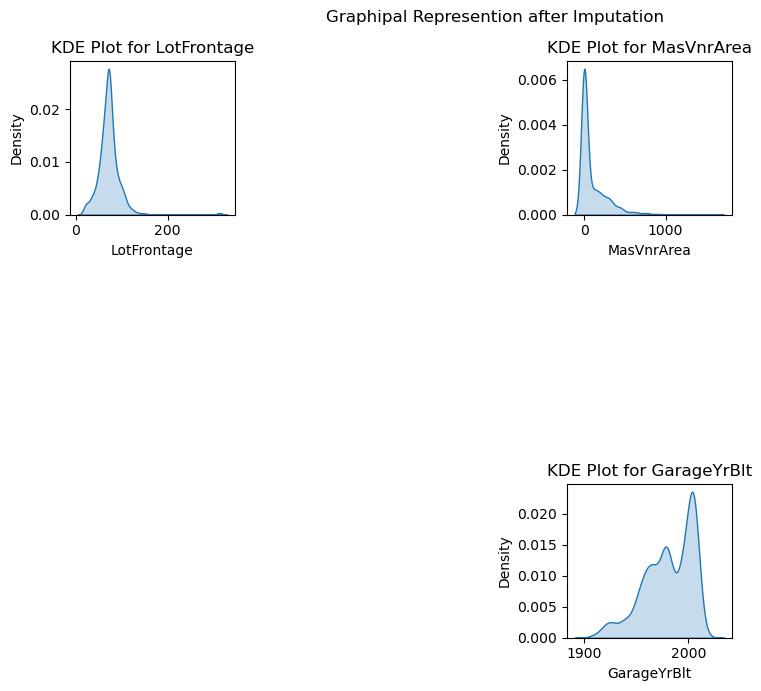

In [24]:
plt.figure(figsize=(10,7))
plt.suptitle("Graphipal Represention after Imputation")
for i, col in enumerate(null_col.values):
    if col in num_col:
        plt.subplot(3,4, i + 1)
        sns.kdeplot(df[col],fill=True)
        plt.title(f'KDE Plot for {col}')

plt.tight_layout()
plt.show()  

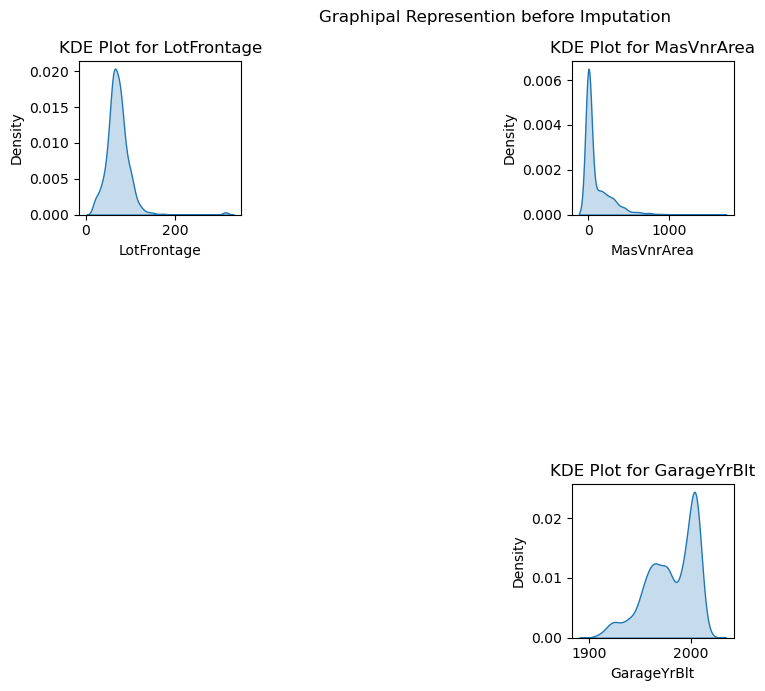

In [25]:
plt.figure(figsize=(10,7))
plt.suptitle("Graphipal Represention before Imputation")
for i, col in enumerate(null_col.values):
    if col in num_col:
        plt.subplot(3,4, i + 1)
        sns.kdeplot(df2[col],fill=True)
        plt.title(f'KDE Plot for {col}')
plt.tight_layout()
plt.show()  

In [26]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wood

In [27]:
df.sample(10)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
1534,1535,45,RM,57.0,8557,Pave,Reg,Bnk,AllPub,Inside,...,205,0,0,0,0,6,2007,WD,Normal,139400
995,996,50,RL,51.0,4712,Pave,IR1,Lvl,AllPub,Inside,...,0,0,63,0,0,8,2006,WD,Abnorml,121600
1028,1029,50,RL,79.0,9492,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2007,WD,Normal,105000
1339,1340,20,RL,120.0,9560,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,6,2006,WD,Normal,128500
1334,1335,160,RM,24.0,2368,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Normal,125000
62,63,120,RL,44.0,6442,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2007,WD,Normal,202500
2051,925,20,RL,313.0,10240,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,207500
730,731,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,236500
1107,1108,60,RL,168.0,23257,Pave,IR3,HLS,AllPub,CulDSac,...,0,0,0,0,0,9,2006,New,Partial,274725
2036,910,60,RL,313.0,12589,Pave,IR2,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Normal,174000


In [28]:
for i in df.columns:
    print(f'No of unique values for {i} are {df[i].nunique()}')

No of unique values for Id are 1820
No of unique values for Dwell_Type are 18
No of unique values for Zone_Class are 5
No of unique values for LotFrontage are 111
No of unique values for LotArea are 1367
No of unique values for Road_Type are 2
No of unique values for Property_Shape are 4
No of unique values for LandContour are 4
No of unique values for Utilities are 2
No of unique values for LotConfig are 5
No of unique values for LandSlope are 3
No of unique values for Neighborhood are 25
No of unique values for Condition1 are 9
No of unique values for Condition2 are 8
No of unique values for Dwelling_Type are 5
No of unique values for HouseStyle are 8
No of unique values for OverallQual are 10
No of unique values for OverallCond are 9
No of unique values for YearBuilt are 117
No of unique values for YearRemodAdd are 72
No of unique values for RoofStyle are 6
No of unique values for RoofMatl are 8
No of unique values for Exterior1st are 15
No of unique values for Exterior2nd are 16
No

### EDA on cateogrical values

In [29]:
print(cat_col,len(cat_col))

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') 38


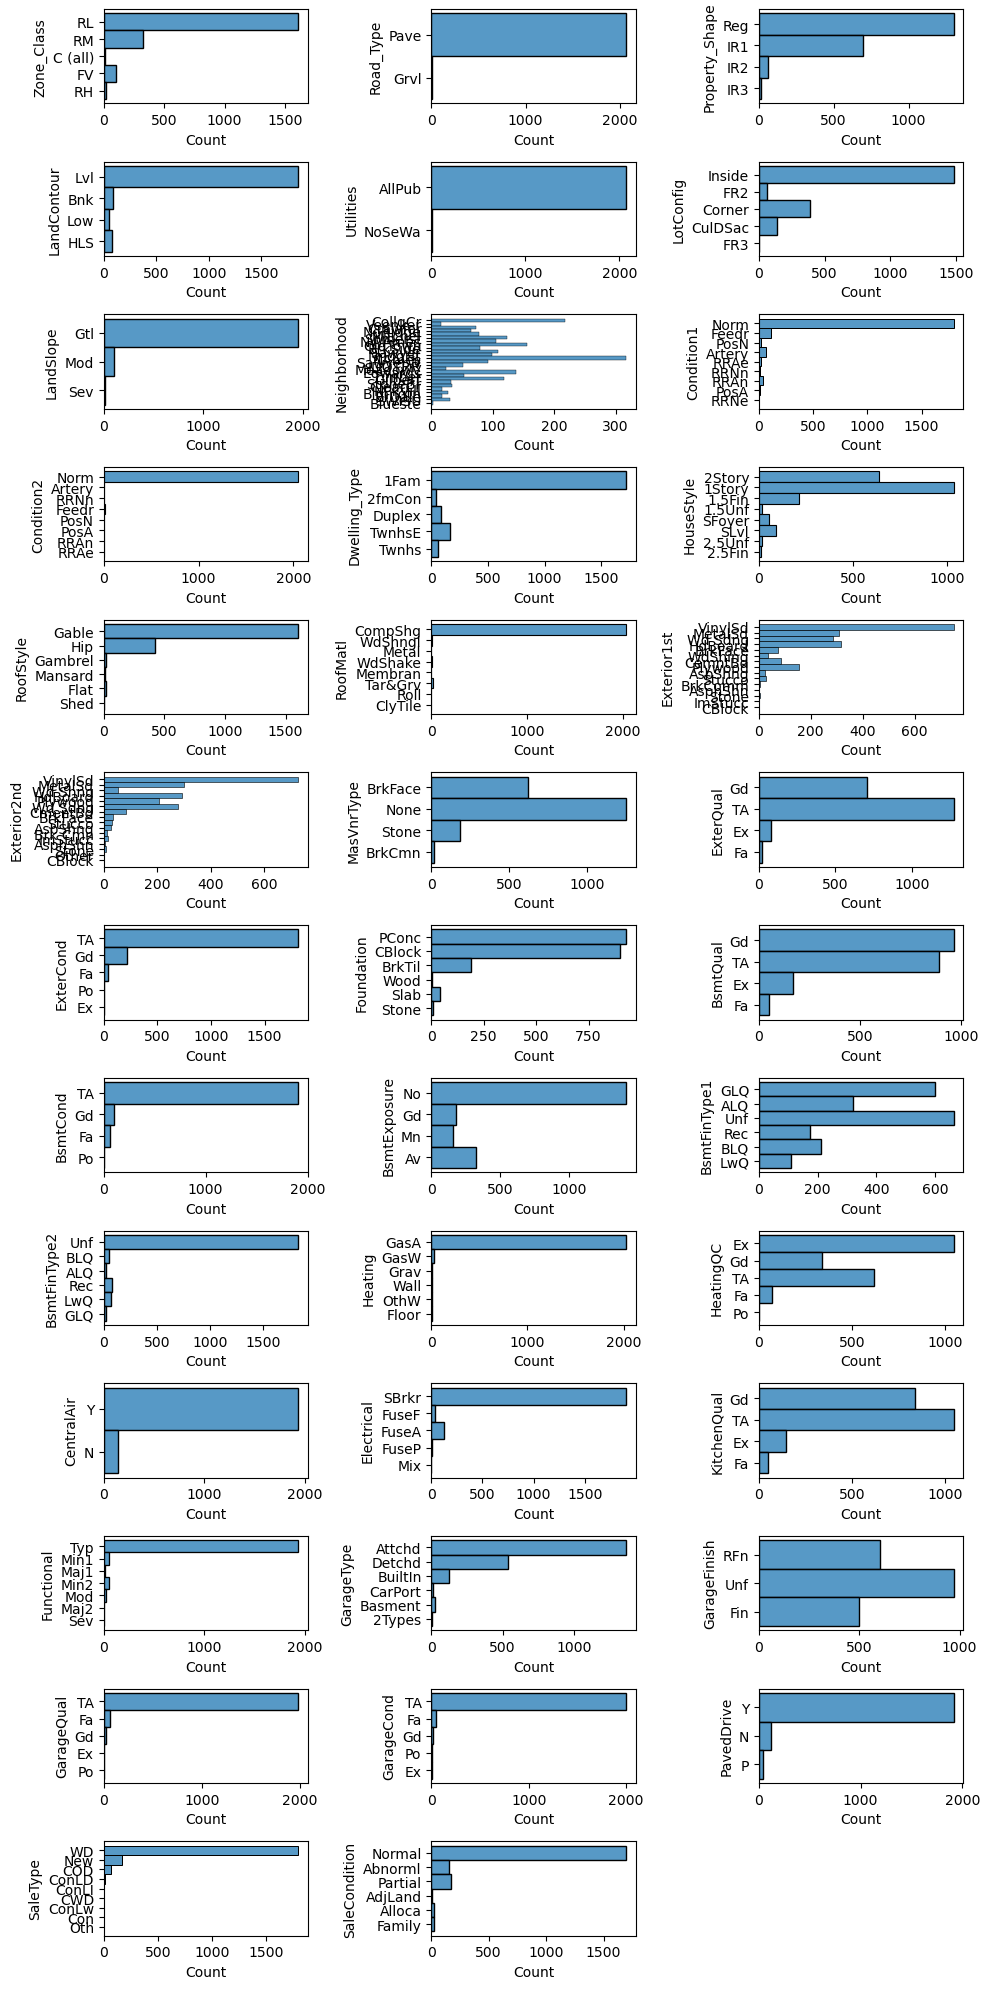

In [30]:
plt.figure(figsize=(10,20))
for i, col in enumerate(cat_col):
    plt.subplot(13,3,i+1)
    sns.histplot(data=df,y=cat_col[i])
plt.tight_layout()
plt.show()

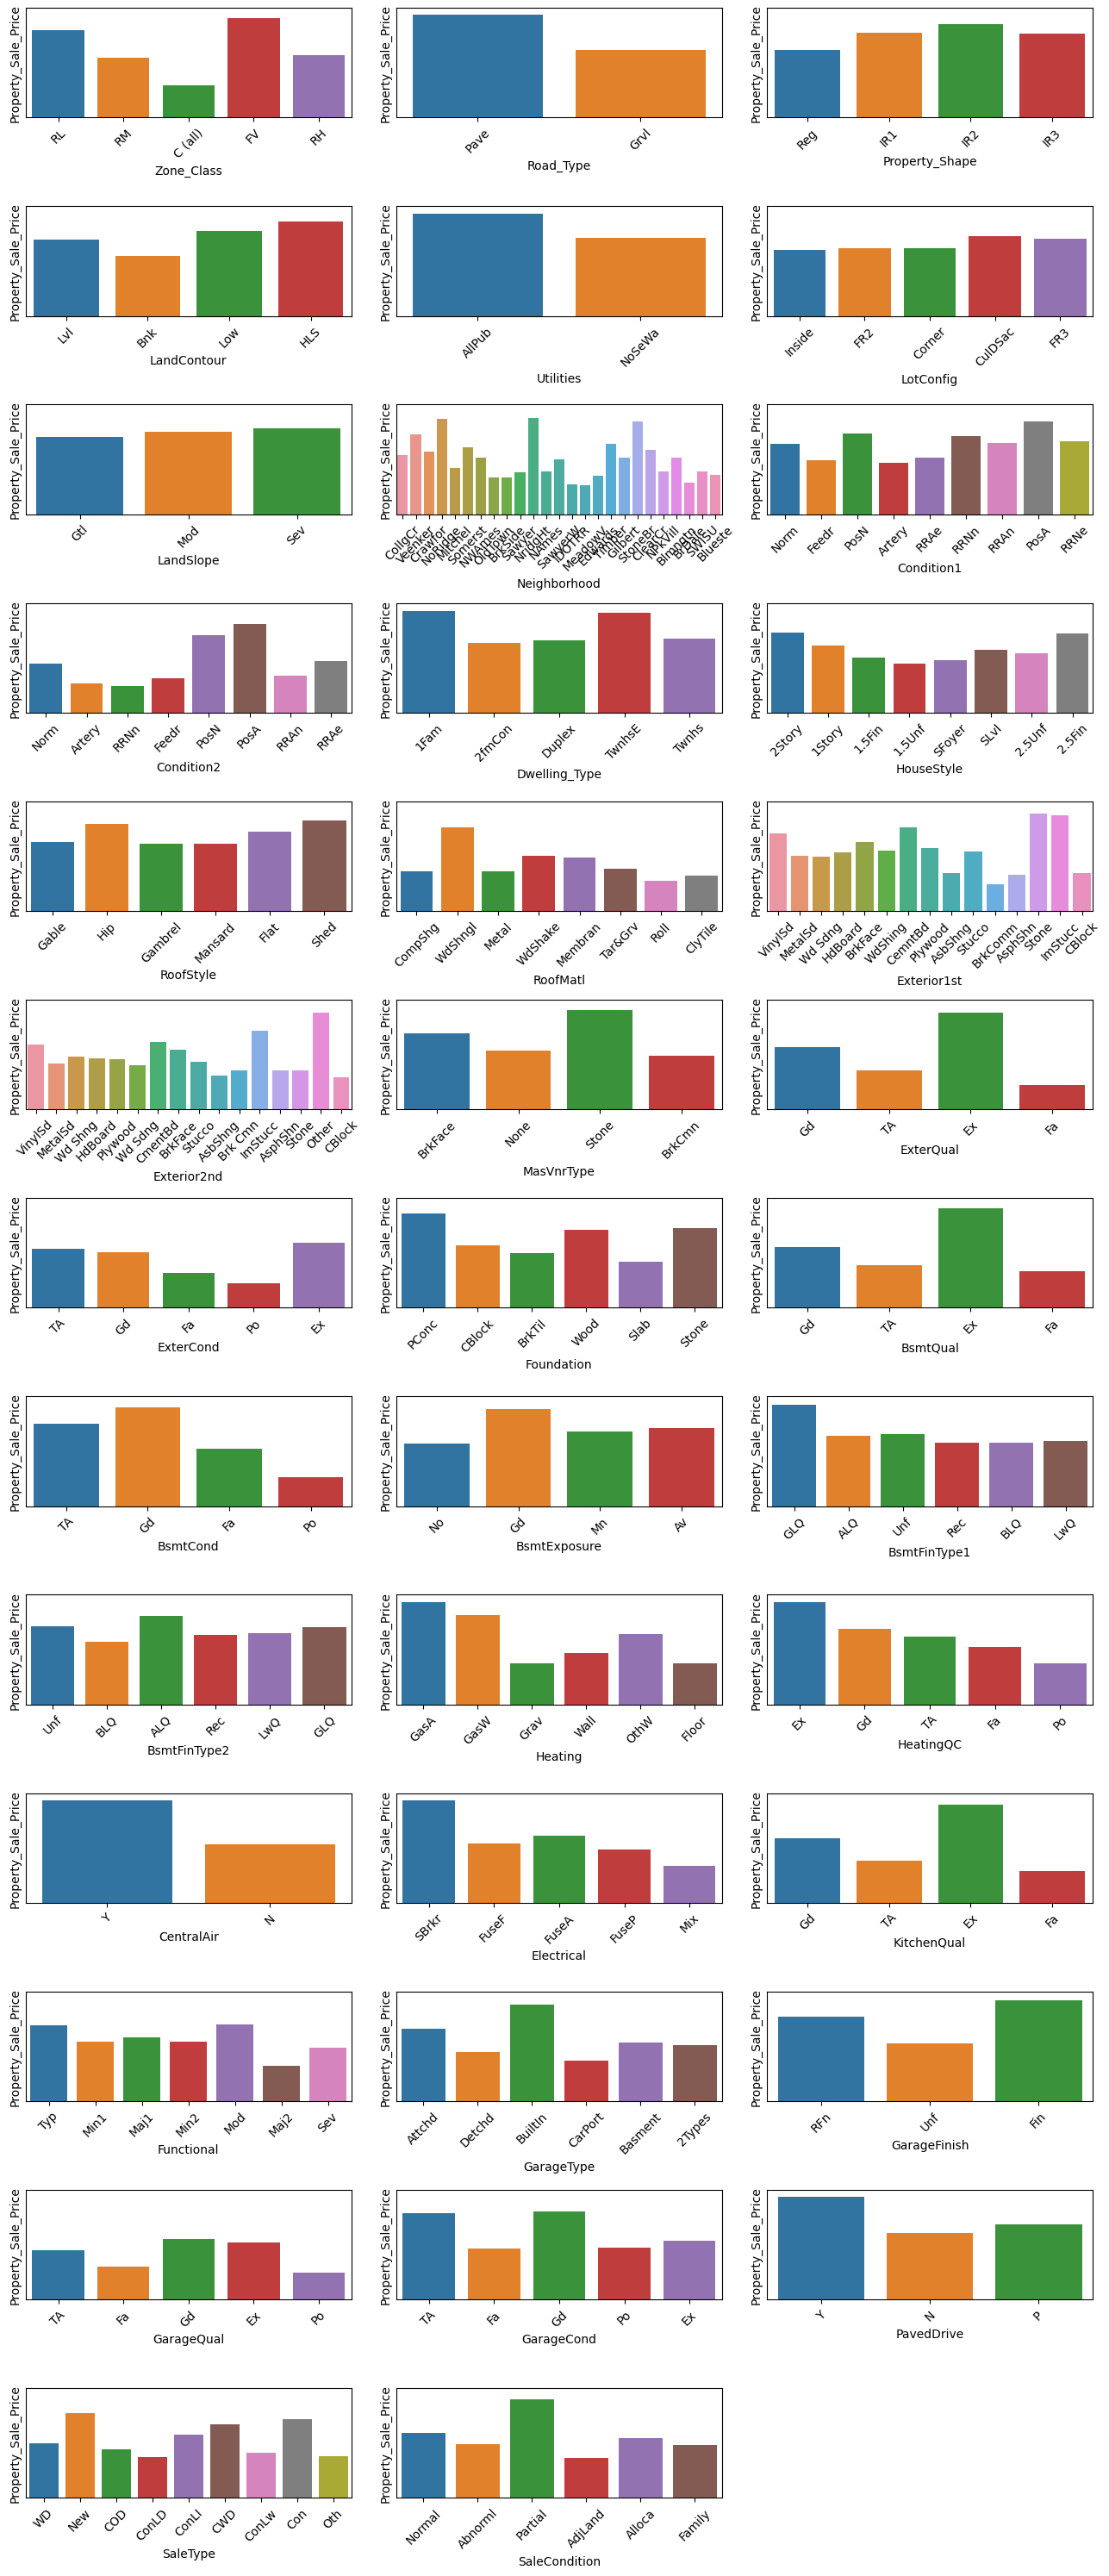

In [31]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(13,30))
for i, col in enumerate(cat_col):
    plt.subplot(13,3,i+1)
    sns.barplot(data=df,x=cat_col[i],y=df['Property_Sale_Price'],bottom=None,errcolor='None')
    #plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0e}'.format(x)))
    plt.yticks([])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Eda for Numerical columns

In [32]:
print(num_col,len(num_col))

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object') 38


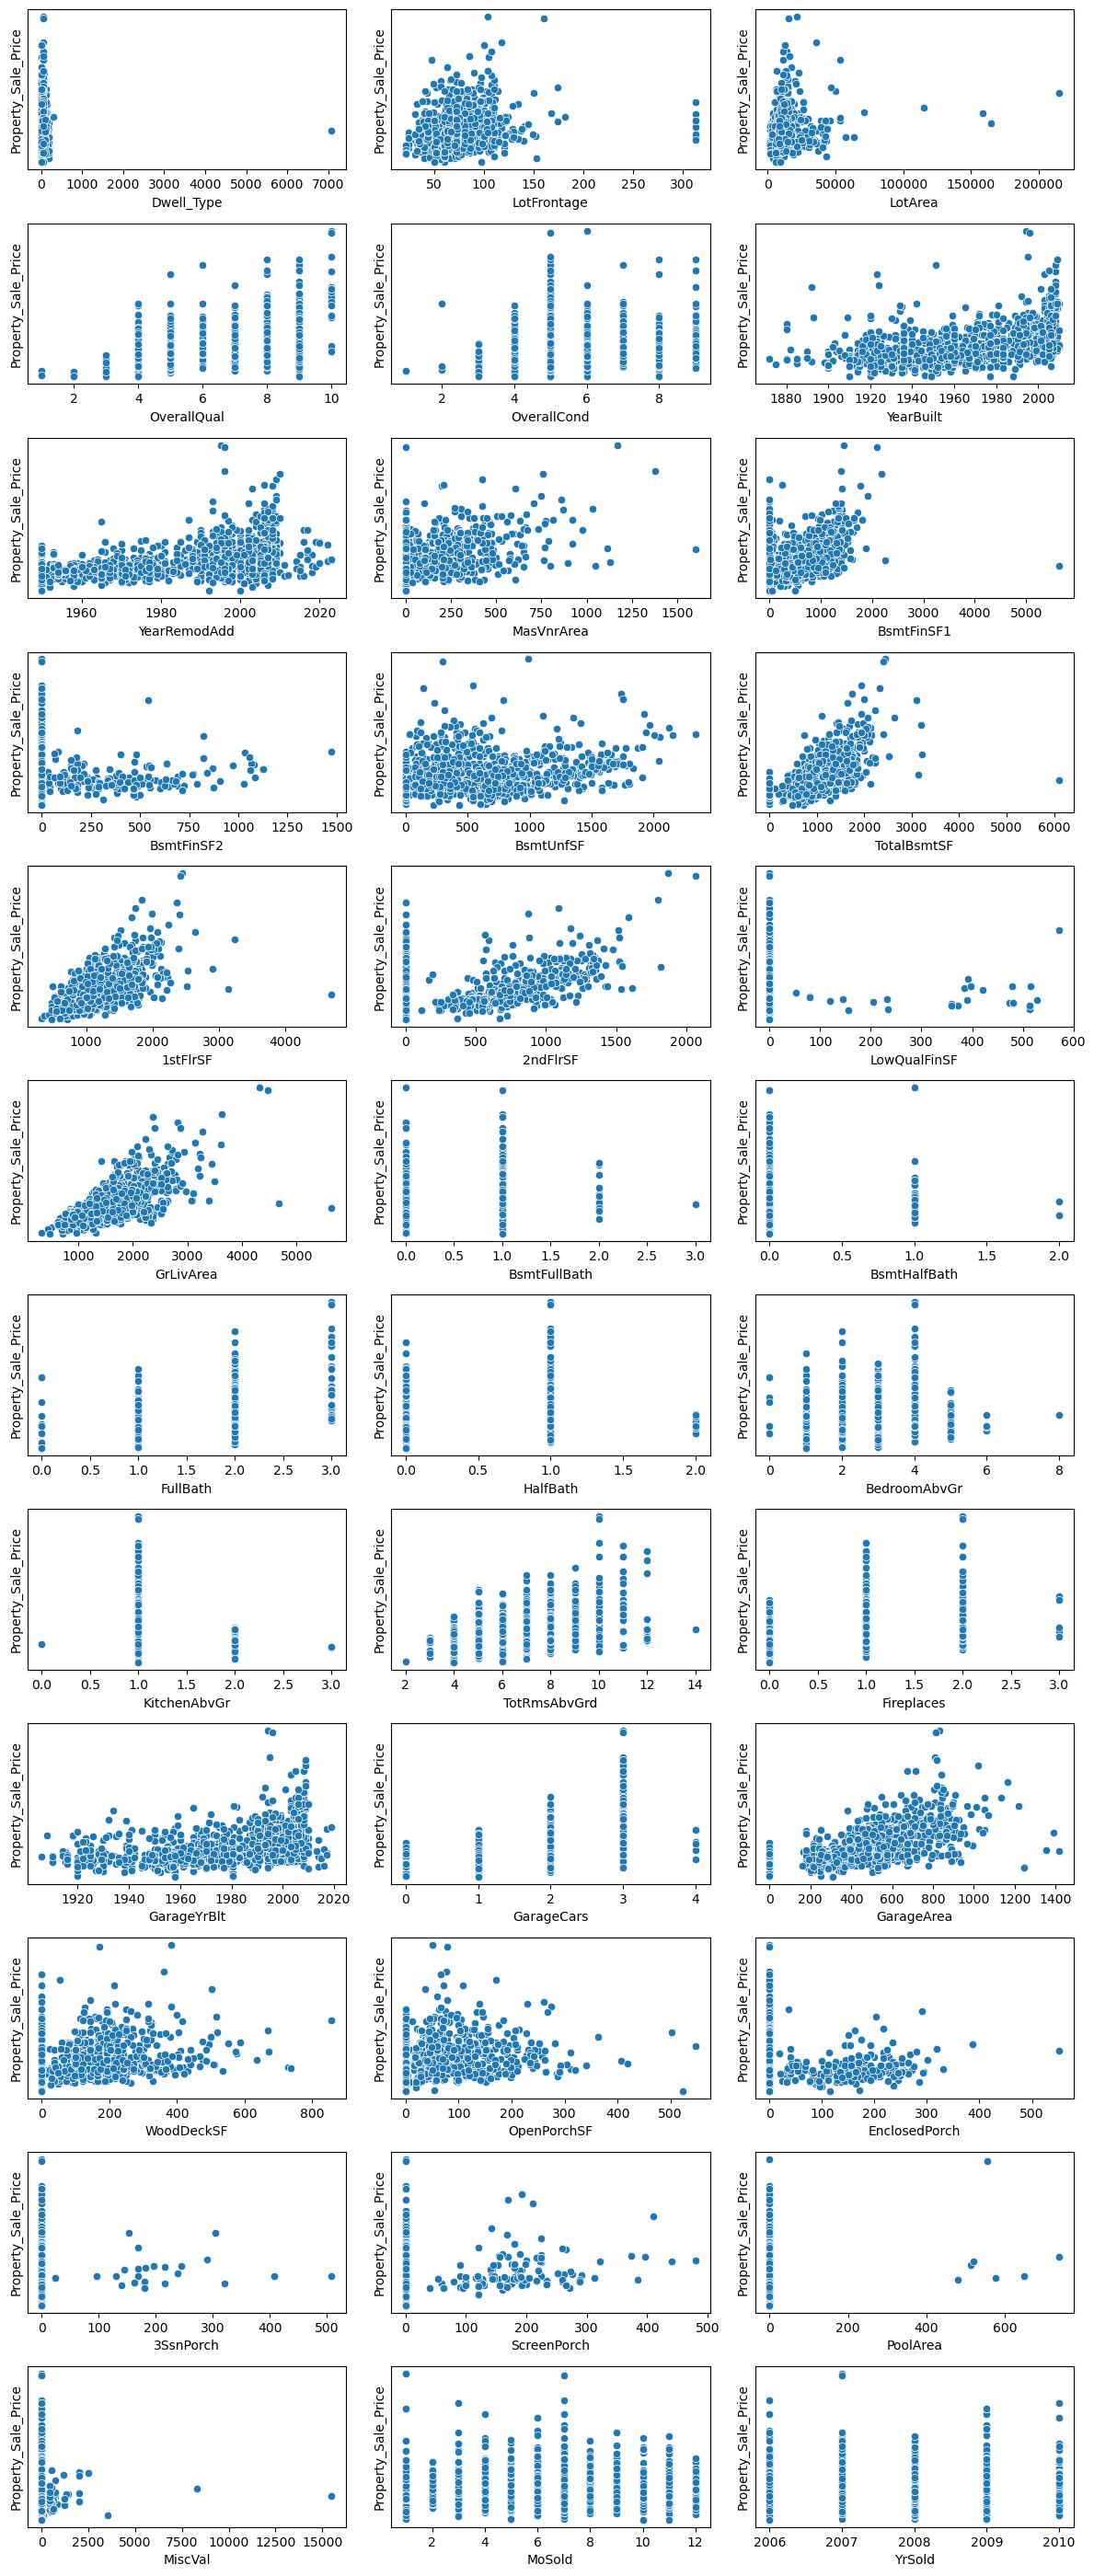

In [33]:
plt.figure(figsize=(12,30))
for i,col in enumerate(num_col[1:-1]):
    plt.subplot(13,3,i+1)
    sns.scatterplot(x=df[col],y=df['Property_Sale_Price'])
    plt.yticks([])
plt.tight_layout()
plt.show()

### Treating outliers

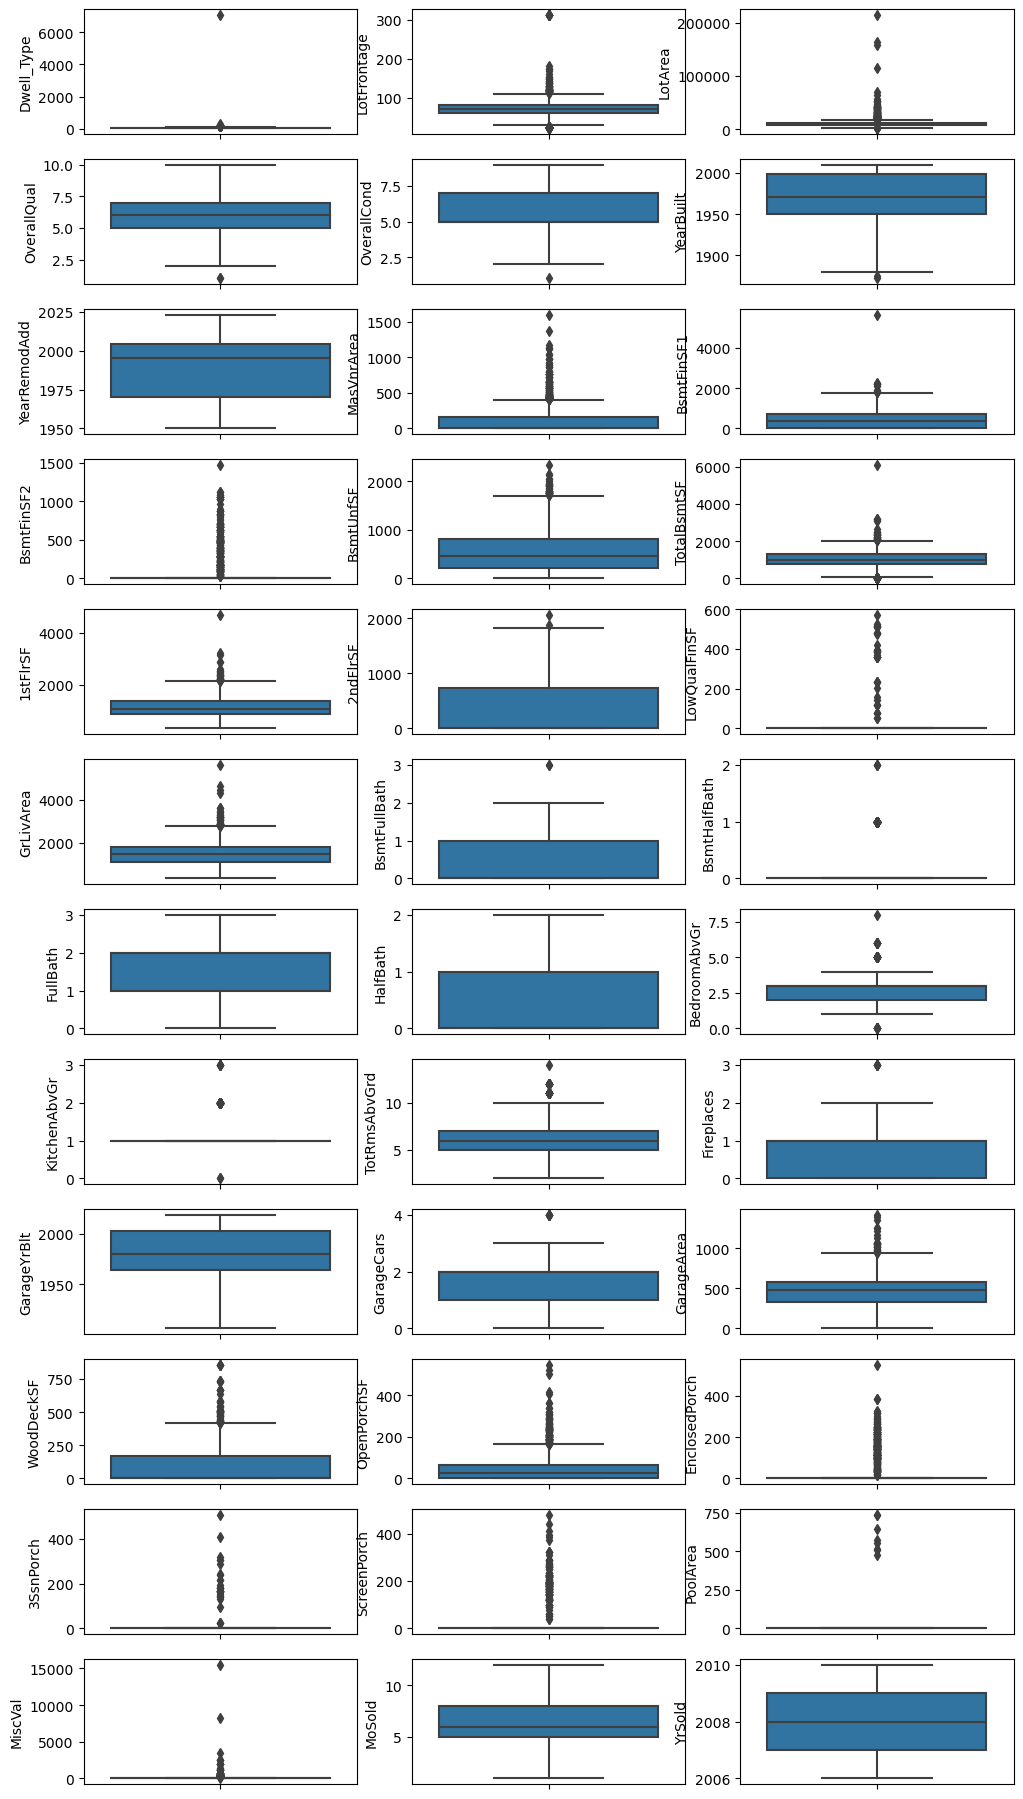

In [34]:
plt.figure(figsize=(12,25))
for i,col in enumerate(num_col[1:-1]):
    plt.subplot(13,3,i+1)
    sns.boxplot(data=df,y=col)
plt.show()
    

In [81]:
x=df.describe(percentiles=(0.01,0.02,0.03,0.97,0.98,0.99)).T
x=x.iloc[:,3:]
x

,min,1%,2%,3%,50%,97%,98%,99%,max
Dwell_Type,0.0,0.00,0.00,0.00,4.0,13.00,15.00,15.00,15.0
Zone_Class,0.0,1.00,1.00,1.00,3.0,4.00,4.00,4.00,4.0
LotFrontage,0.0,0.00,1.00,3.00,44.0,86.00,90.00,100.28,101.0
LotArea,0.0,0.72,12.00,24.16,609.0,1299.84,1317.56,1338.28,1339.0
Road_Type,0.0,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0
...,...,...,...,...,...,...,...,...,...
MiscVal,0.0,0.00,0.00,0.00,0.0,3.00,6.00,10.00,10.0
MoSold,0.0,0.00,0.00,0.00,5.0,11.00,11.00,11.00,11.0
SaleType,0.0,0.00,0.00,0.00,8.0,8.00,8.00,8.00,8.0
SaleCondition,0.0,0.00,0.00,0.00,4.0,5.00,5.00,5.00,5.0


In [35]:
out_lier=df.describe(percentiles=(0.01,0.02,0.03,0.04,0.95,0.96,0.97,0.98,0.99)).T
out_lier=out_lier.iloc[:,3:]
out_lier

,min,1%,2%,3%,4%,50%,95%,96%,97%,98%,99%,max
Id,1.0,21.72,42.44,63.16,83.88,932.000000,1716.4,1737.12,1757.84,1778.56,1799.28,1820.0
Dwell_Type,20.0,20.00,20.00,20.00,20.00,50.000000,160.0,160.00,160.00,190.00,190.00,7080.0
LotFrontage,21.0,21.00,24.00,32.00,34.00,72.056475,107.0,109.00,115.00,121.00,141.84,313.0
LotArea,1300.0,1884.12,2268.00,2645.96,3182.00,9492.000000,20112.4,22986.84,26081.52,32276.44,40950.48,215245.0
OverallQual,1.0,3.00,4.00,4.00,4.00,6.000000,9.0,9.00,9.00,9.00,9.00,10.0
OverallCond,1.0,3.00,4.00,4.00,4.00,5.000000,9.0,9.00,9.00,9.00,9.00,9.0
YearBuilt,1872.0,1900.00,1905.44,1910.00,1914.00,1971.000000,2007.0,2007.00,2007.00,2008.00,2009.00,2010.0
YearRemodAdd,1950.0,1950.00,1950.00,1950.00,1950.00,1995.000000,2008.0,2009.00,2009.00,2011.56,2017.00,2023.0
MasVnrArea,0.0,0.00,0.00,0.00,0.00,0.000000,448.0,480.00,571.00,651.00,776.48,1600.0
BsmtFinSF1,0.0,0.00,0.00,0.00,0.00,381.000000,1238.0,1300.00,1351.00,1438.24,1572.28,5644.0


In [36]:

x=['Dwell_Type','LotFrontage','LotArea',"MasVnrArea","BsmtFinSF1",'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
  '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
  '3SsnPorch','ScreenPorch','PoolArea','MiscVal','Property_Sale_Price']

for col in x: 
    df[col]=np.where(df[col]>df[col].quantile(0.99),df[col].quantile(0.99),df[col])
    df[col]=np.where(df[col]<df[col].quantile(0.01),df[col].quantile(0.01),df[col])
    

In [37]:
out_lier=df.describe(percentiles=(0,0.01,0.02,0.03,0.04,0.95,0.96,0.97,0.98,0.99)).T
out_lier=out_lier.iloc[:,3:]
out_lier

,min,0%,1%,2%,3%,4%,50%,95%,96%,97%,98%,99%,max
Id,1.00,1.00,21.7200,42.44,63.16,83.88,932.000000,1716.4,1737.12,1757.84,1778.56,1799.2800,1820.00
Dwell_Type,20.00,20.00,20.0000,20.00,20.00,20.00,50.000000,160.0,160.00,160.00,190.00,190.0000,190.00
LotFrontage,21.00,21.00,21.0000,24.00,32.00,34.00,72.056475,107.0,109.00,115.00,121.00,141.2352,141.84
LotArea,1884.12,1884.12,1888.3536,2268.00,2645.96,3182.00,9492.000000,20112.4,22986.84,26081.52,32276.44,40932.1344,40950.48
OverallQual,1.00,1.00,3.0000,4.00,4.00,4.00,6.000000,9.0,9.00,9.00,9.00,9.0000,10.00
OverallCond,1.00,1.00,3.0000,4.00,4.00,4.00,5.000000,9.0,9.00,9.00,9.00,9.0000,9.00
YearBuilt,1872.00,1872.00,1900.0000,1905.44,1910.00,1914.00,1971.000000,2007.0,2007.00,2007.00,2008.00,2009.0000,2010.00
YearRemodAdd,1950.00,1950.00,1950.0000,1950.00,1950.00,1950.00,1995.000000,2008.0,2009.00,2009.00,2011.56,2017.0000,2023.00
MasVnrArea,0.00,0.00,0.0000,0.00,0.00,0.00,0.000000,448.0,480.00,571.00,651.00,773.2544,776.48
BsmtFinSF1,0.00,0.00,0.0000,0.00,0.00,0.00,381.000000,1238.0,1300.00,1351.00,1438.24,1572.0784,1572.28


### Correlatiom Matrix

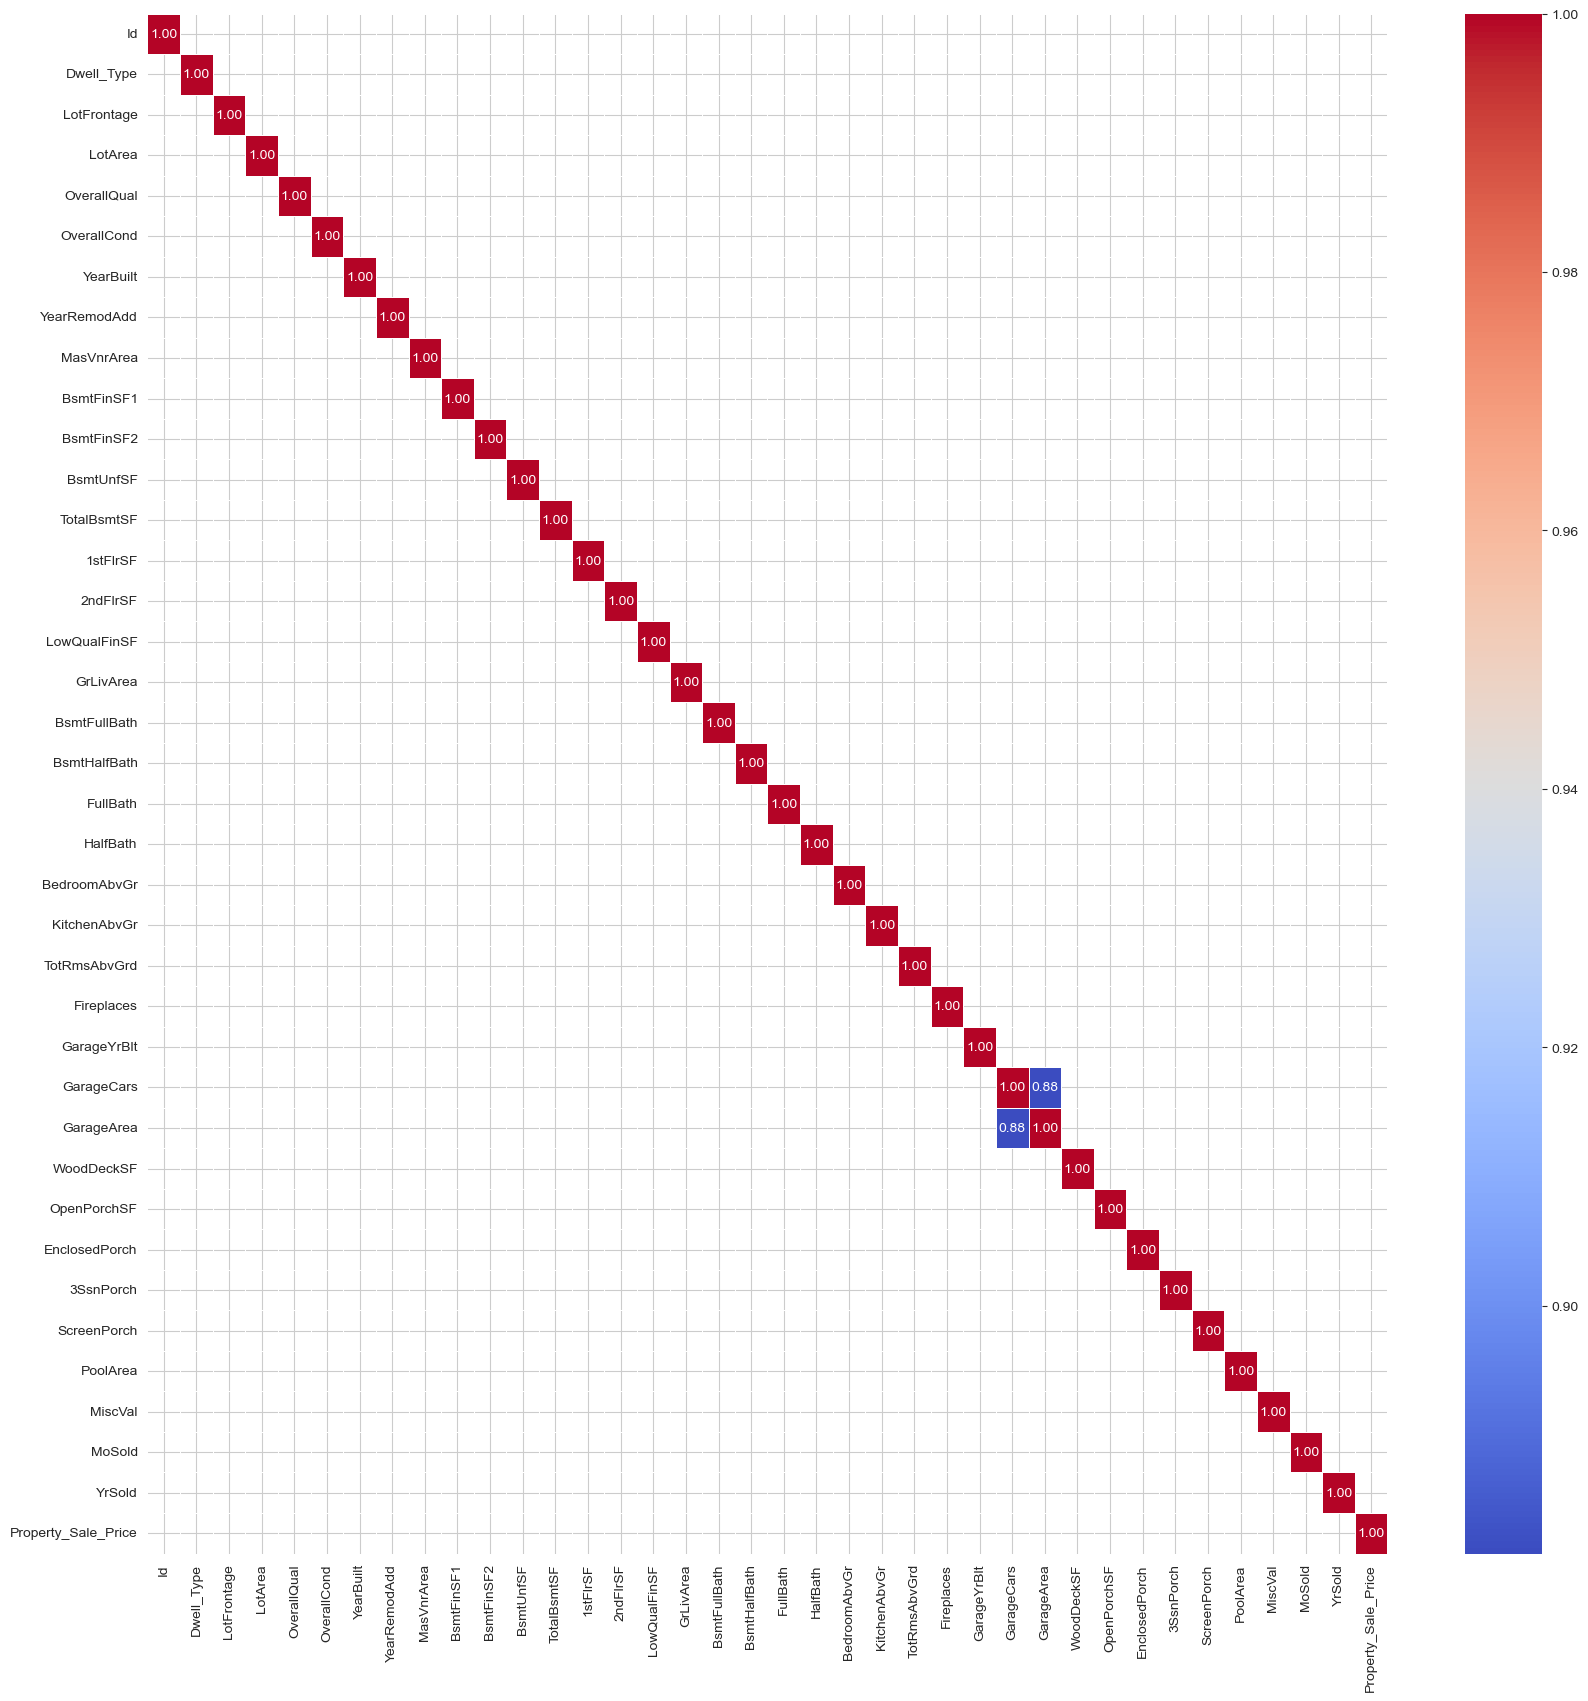

In [88]:
plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
corr=df[num_col].corr()
sns.heatmap(corr[abs(corr)>0.85],cmap='coolwarm',annot=True,linewidths=0.5, linecolor='white', fmt=".2f")
plt.show()

In [89]:
#Highly corelated column is GarageCars and GarageArea we will drop

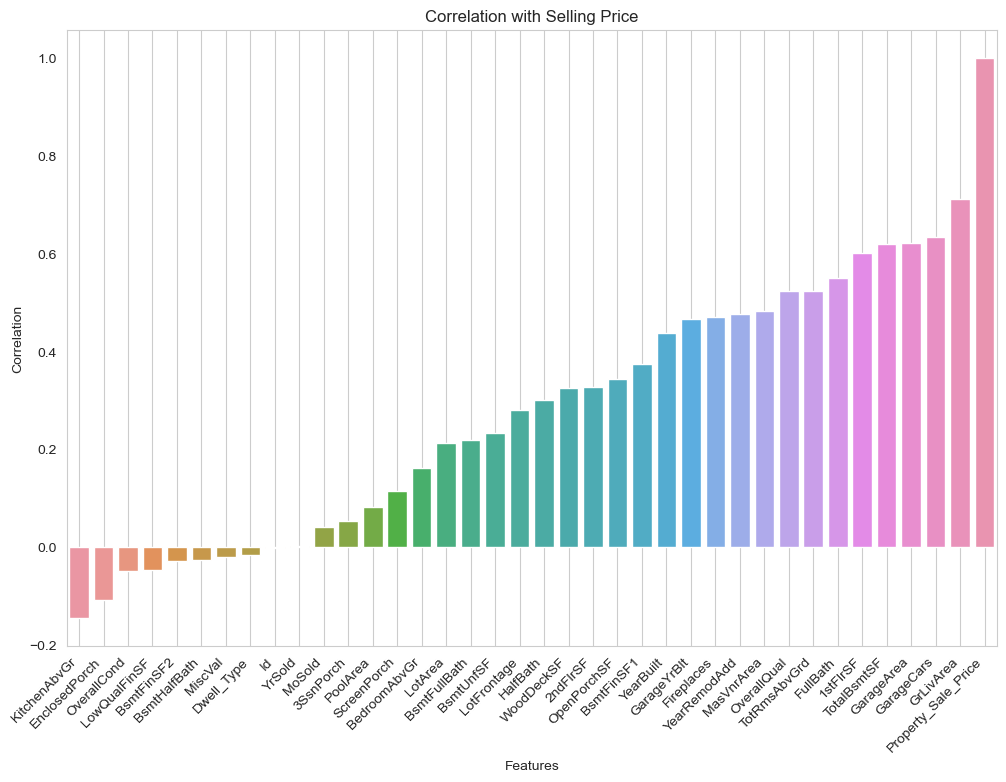

In [90]:
cor_with_target=corr["Property_Sale_Price"].sort_values(ascending=True)
plt.figure(figsize=(12, 8))
sns.barplot(x=cor_with_target.index, y=cor_with_target.values)
plt.xticks(rotation=45, ha="right")
plt.title('Correlation with Selling Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.grid()
plt.show()

In [91]:
df.columns = df.columns.str.strip()

In [92]:
#Id and Yrsold has zero impact on target variable we will drop it
df.drop(["Id","YrSold","GarageArea"],inplace=True,axis=1)
df.shape

(2073, 78)

### Encoding

In [43]:
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,Property_Sale_Price
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61.0,0.00,0.0,0.0,0.0,0.0,2,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.00,0.0,0.0,0.0,0.0,5,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42.0,0.00,0.0,0.0,0.0,0.0,9,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35.0,252.56,0.0,0.0,0.0,0.0,2,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84.0,0.00,0.0,0.0,0.0,0.0,12,WD,Normal,250000.0


In [44]:
for i in cat_col:
    print(f'No of unique values for {i} are {df[i].nunique()}')

No of unique values for Zone_Class are 5
No of unique values for Road_Type are 2
No of unique values for Property_Shape are 4
No of unique values for LandContour are 4
No of unique values for Utilities are 2
No of unique values for LotConfig are 5
No of unique values for LandSlope are 3
No of unique values for Neighborhood are 25
No of unique values for Condition1 are 9
No of unique values for Condition2 are 8
No of unique values for Dwelling_Type are 5
No of unique values for HouseStyle are 8
No of unique values for RoofStyle are 6
No of unique values for RoofMatl are 8
No of unique values for Exterior1st are 15
No of unique values for Exterior2nd are 16
No of unique values for MasVnrType are 4
No of unique values for ExterQual are 4
No of unique values for ExterCond are 5
No of unique values for Foundation are 6
No of unique values for BsmtQual are 4
No of unique values for BsmtCond are 4
No of unique values for BsmtExposure are 4
No of unique values for BsmtFinType1 are 6
No of uniq

In [45]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for col in df.columns:
    df[col] = lb.fit_transform(df[col])


### Feature Selection

In [46]:
x=df.drop(['Property_Sale_Price'],axis=1)
y=df['Property_Sale_Price']
print(x.shape)
print(y.shape)

(2073, 72)
(2073,)


In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [48]:
x_sc=sc.fit_transform(x)

### train_test_split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=30,random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2043, 72)
(30, 72)
(2043,)
(30,)


In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [52]:
def model_eval(x_train,y_train,x_test,y_test,model,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    mse=mean_squared_error(y_test,ypred)
    mae=mean_absolute_error(y_test,ypred)
    rmse=np.sqrt(mse)
    train_scr=model.score(x_train,y_train)
    test_scr=model.score(x_test,y_test)
    res=pd.DataFrame({"Training_score":train_scr,"Testing_score":test_scr,"RMSE":rmse,
                     "MSE":mse,"MAE":mae},index=[mname])
    return res

In [53]:
lg=LinearRegression()
res_lg=model_eval(x_train,y_train,x_test,y_test,lg,"Linear")
res_lg

,Training_score,Testing_score,RMSE,MSE,MAE
Linear,0.906523,0.95419,36.031375,1298.25997,26.079222


In [54]:
lasso=Lasso(0.8)
res_ls=model_eval(x_train,y_train,x_test,y_test,lasso,"Lasso")
res_ls

,Training_score,Testing_score,RMSE,MSE,MAE
Lasso,0.905076,0.955901,35.352346,1249.788397,25.562031


In [55]:
dt=DecisionTreeRegressor(min_samples_split=6,max_depth=10,min_samples_leaf=2,random_state=23)
res_dt=model_eval(x_train,y_train,x_test,y_test,dt,"Decision Tree")
res_dt

,Training_score,Testing_score,RMSE,MSE,MAE
Decision Tree,0.974505,0.804795,74.378438,5532.152055,49.514443


In [56]:
bg1=BaggingRegressor(n_estimators=100,estimator=dt,max_features=x_train.shape[1],
                        max_samples=x_train.shape[0])
res_bg_dt=model_eval(x_train,y_train,x_test,y_test,bg1,"Bagging with DT")
res_bg_dt

,Training_score,Testing_score,RMSE,MSE,MAE
Bagging with DT,0.97767,0.924642,46.213267,2135.666082,30.293954


In [57]:
ada_dt=AdaBoostRegressor(n_estimators=100,estimator=dt)
res_ada_dt=model_eval(x_train,y_train,x_test,y_test,ada_dt,"Adda_Boost_DT")
res_ada_dt

,Training_score,Testing_score,RMSE,MSE,MAE
Adda_Boost_DT,0.996421,0.952554,36.669233,1344.632681,19.270527


In [58]:
rf=RandomForestRegressor(n_estimators=100,min_samples_split=6,max_depth=10,min_samples_leaf=2,random_state=23)
res_rf=model_eval(x_train,y_train,x_test,y_test,rf,"Randomforest Tree")
res_rf

,Training_score,Testing_score,RMSE,MSE,MAE
Randomforest Tree,0.97794,0.934609,43.048908,1853.208472,28.427711


In [59]:
bg1=BaggingRegressor(n_estimators=60,estimator=rf,max_features=x_train.shape[1],
                        max_samples=x_train.shape[0])
res_bg_rf=model_eval(x_train,y_train,x_test,y_test,bg1,"Bagging with RF")
res_bg_rf

,Training_score,Testing_score,RMSE,MSE,MAE
Bagging with RF,0.959826,0.947588,38.540483,1485.368835,26.817032


In [60]:
ada_rf=AdaBoostRegressor(n_estimators=60,estimator=rf)
res_ada_rf=model_eval(x_train,y_train,x_test,y_test,ada_rf,"Adda_Boost_RF")
res_ada_rf

,Training_score,Testing_score,RMSE,MSE,MAE
Adda_Boost_RF,0.990984,0.948207,38.31205,1467.813191,24.014489


In [61]:
knn=KNeighborsRegressor(n_neighbors=7)
res_knn=model_eval(x_train,y_train,x_test,y_test,knn,"KNeighbors")
res_knn

,Training_score,Testing_score,RMSE,MSE,MAE
KNeighbors,0.89627,0.807003,73.956703,5469.593878,53.633333


In [62]:
x=df.shape[0]
print(x)

2073


In [63]:
x=df.shape[0]
y=int(np.sqrt(x))
print(y)
def optimal_K():
    k = list(range(3,y,2)) # k= 3,5,7,9....,35,37,39
    acc = []
    for i in range(len(k)):
        knn_model = KNeighborsRegressor(n_neighbors=k[i])
        knn_model.fit(x_train,y_train)
        acc.append(knn_model.score(x_test,y_test))
    print('Accuracy\n',acc)
    plt.plot(k,acc,color='maroon',marker='o')
    plt.xlabel('Num of Nearest Nerighbors')
    plt.ylabel('Test accuarcy')
    plt.grid()
    plt.show()

45


Accuracy
 [0.7469861880051607, 0.7948114492471566, 0.8070027075027488, 0.7741422485422345, 0.785711830310863, 0.7859129186563719, 0.7744964015858711, 0.7684502828992954, 0.7821867384002237, 0.7969628151428734, 0.8094295016379479, 0.8214759308272691, 0.8221108567671136, 0.820790222721592, 0.8279096330400423, 0.8377016982090659, 0.8415541177731546, 0.8439731349475991, 0.842705364960936, 0.8426360056936449, 0.8414307628081745]


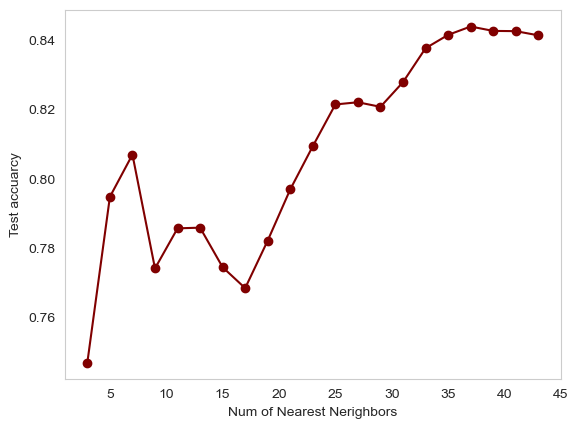

In [64]:
optimal_K()

In [65]:
knn1=KNeighborsRegressor(n_neighbors=37)
res_knn1=model_eval(x_train,y_train,x_test,y_test,knn1,"KNeighbors 1")
res_knn1

,Training_score,Testing_score,RMSE,MSE,MAE
KNeighbors 1,0.84529,0.843973,66.496934,4421.842269,52.673874


In [66]:
res=pd.concat([res_lg,res_ls,res_dt,res_bg_dt,res_ada_dt,res_rf,res_bg_rf,res_ada_rf,res_knn,res_knn1])
res

,Training_score,Testing_score,RMSE,MSE,MAE
Linear,0.906523,0.954190,36.031375,1298.259970,26.079222
Lasso,0.905076,0.955901,35.352346,1249.788397,25.562031
Decision Tree,0.974505,0.804795,74.378438,5532.152055,49.514443
Bagging with DT,0.977670,0.924642,46.213267,2135.666082,30.293954
Adda_Boost_DT,0.996421,0.952554,36.669233,1344.632681,19.270527
Randomforest Tree,0.977940,0.934609,43.048908,1853.208472,28.427711
Bagging with RF,0.959826,0.947588,38.540483,1485.368835,26.817032
Adda_Boost_RF,0.990984,0.948207,38.312050,1467.813191,24.014489
KNeighbors,0.896270,0.807003,73.956703,5469.593878,53.633333
KNeighbors 1,0.845290,0.843973,66.496934,4421.842269,52.673874


#### Conclusion
Random Forest and Bagging with Random Forest seem to be performing well overall, providing high training and testing scores with relatively lower errors.

Linear Regression and Lasso also perform well and might be good choices if interpretability is important.

Decision Tree, AdaBoost with Decision Tree, and AdaBoost with Random Forest show lower performance compared to other models.

In [67]:
import pickle

In [68]:
with open('houseprice_sc'.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

SyntaxError: unterminated string literal (detected at line 1) (2419312792.py, line 1)

In [ ]:
randf=RandomForestRegressor(n_estimators=100,min_samples_split=6,max_depth=10,min_samples_leaf=2,random_state=23)
final_model=AdaBoostRegressor(n_estimators=60,estimator=rf)
final_model.fit(x_train,y_train)


In [ ]:
with open('houseprice_ml.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

In [ ]:
df.columns

In [ ]:
#XG boost ,ann, svm

In [ ]:
x=['BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition']

In [ ]:
data.columns

In [ ]:
data = pd.read_csv("HousePrices.csv")
data.drop(["Id", "YrSold", "GarageArea", 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True, axis=1)



In [ ]:
X = data.drop(['Property_Sale_Price'], axis=1)
Y = data['Property_Sale_Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=30, random_state=40)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


In [ ]:
preprocess = ColumnTransformer([("Categorical", categorical_processor, cat_col1),
                                ("Numerical", numeric_processor, num_col1)])
